# IMPORT

In [1]:
import glob
from pathlib import Path
import scipy.io as sio

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix, accuracy_score
from sklearn.utils import resample

import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, InputLayer, LSTM, GRU, BatchNormalization, Bidirectional, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical

# Data loading

In [2]:
p = Path(r"C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII")
cnt = 1
for x in p.iterdir():
    if x.is_dir():
        print(x)
        df = []
        path_of_the_directory = x
        print("Files and directories in a specified path:")
        file = Path(path_of_the_directory ).glob('*')
        for i in file:
            #print(i)
            test = sio.loadmat(i)
            df.append(test['val'][0])
        data = pd.DataFrame(df)
        filename = 'data'+str(cnt) + '.csv'
        data.to_csv(filename)
        cnt += 1

C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\1 NSR
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\10 VT
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\11 IVR
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\12 VFL
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\13 Fusion
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\14 LBBBB
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\15 RBBBB
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\16 SDHB
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\17 PR
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\2 APB
Files and directories in a specified path:
C:\Users\SOUMYA\@DS&AI\Projects\Heart\MLII\3 AFL
Files and directo

In [3]:
l = []
for i in range(1, 18):
    d = pd.read_csv('data'+str(i)+'.csv')
    d[3600] = i
    l.append(d)
len(l)

17

In [4]:
df = pd.concat([data for data in l])
df.shape

(1000, 3602)

In [5]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
0,0,953,951,949,948,950,950,951,948,946,...,938,938,941,944,943,943,940,943,944,1
1,1,915,927,934,936,935,938,938,936,935,...,965,964,965,966,966,966,965,963,962,1
2,2,989,984,981,981,983,987,984,982,982,...,947,946,952,951,952,949,949,949,952,1
3,3,957,961,961,960,960,961,964,968,968,...,1128,1042,967,928,925,936,948,953,952,1
4,4,942,943,943,944,948,954,955,954,955,...,987,988,991,989,988,988,986,986,987,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,8,1233,1153,1064,993,961,954,950,946,944,...,980,980,979,985,983,981,980,978,981,17
9,9,1192,1248,1301,1334,1328,1277,1194,1099,1027,...,1002,1042,1092,1152,1203,1249,1288,1312,1294,17
10,10,1285,1252,1183,1101,1020,964,942,938,937,...,1000,1002,1006,1017,1030,1040,1041,1032,1030,17
11,11,979,983,981,978,976,978,982,980,982,...,934,949,971,1007,1053,1115,1174,1227,1269,17


# EDA + Sampling

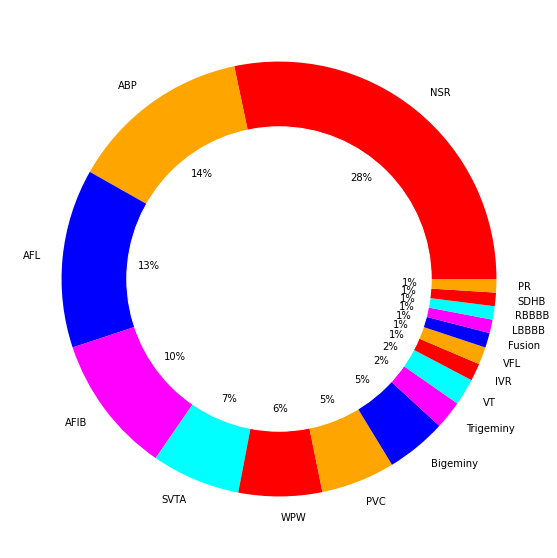

In [6]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(df[3600].value_counts(), labels=['NSR','ABP','AFL','AFIB','SVTA','WPW',
                                           'PVC','Bigeminy','Trigeminy','VT','IVR',
                                           'VFL','Fusion','LBBBB','RBBBB','SDHB','PR'],
        autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<AxesSubplot:xlabel='3600', ylabel='count'>

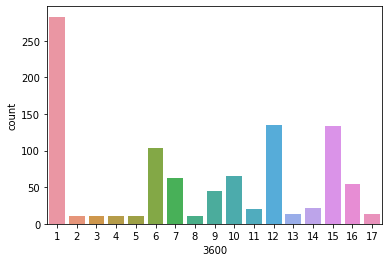

In [7]:
sns.countplot(x=3600, data = df) 

In [8]:
for i in range(0, 17):
    if (len(l[i])) <= 100:
        l[i] = resample(l[i], n_samples = 100, replace = True, random_state = 123)

In [9]:
df = pd.concat([data for data in l])
df.shape

(1954, 3602)

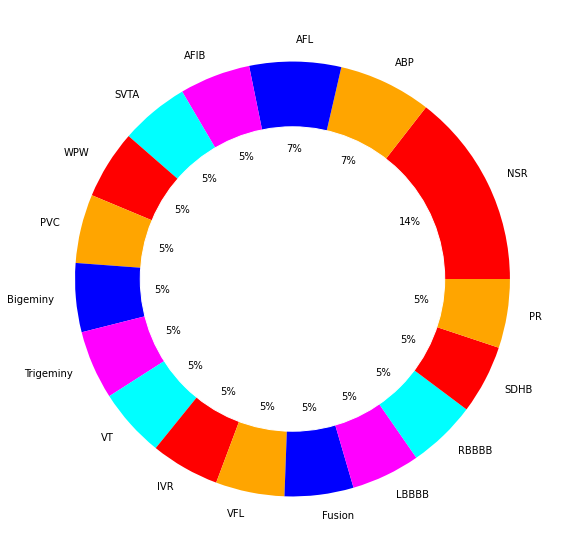

In [10]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(df[3600].value_counts(), labels=['NSR','ABP','AFL','AFIB','SVTA','WPW',
                                           'PVC','Bigeminy','Trigeminy','VT','IVR',
                                           'VFL','Fusion','LBBBB','RBBBB','SDHB','PR'],
        autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<AxesSubplot:xlabel='3600', ylabel='count'>

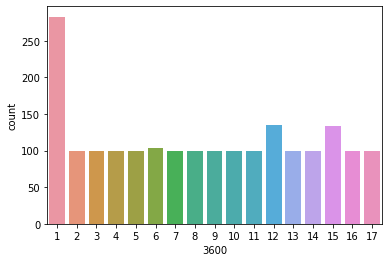

In [11]:
sns.countplot(x=3600, data = df) 

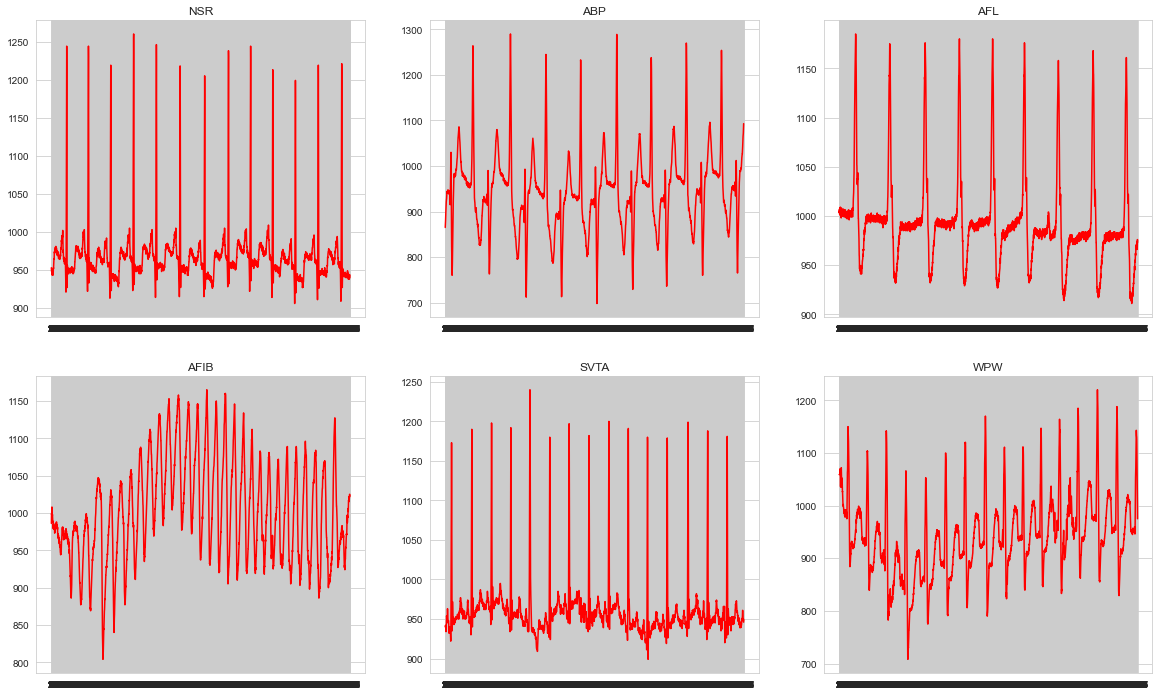

In [87]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.set_style('whitegrid')
plt.title("NSR", fontsize = 12)
plt.plot(l[0].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,2)
sns.set_style('whitegrid')
plt.title("ABP", fontsize = 12)
plt.plot(l[1].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,3)
sns.set_style('whitegrid')
plt.title("AFL", fontsize = 12)
plt.plot(l[2].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,4)
sns.set_style('whitegrid')
plt.title("AFIB", fontsize = 12)
plt.plot(l[3].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,5)
sns.set_style('whitegrid')
plt.title("SVTA", fontsize = 12)
plt.plot(l[4].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,6)
sns.set_style('whitegrid')
plt.title("WPW", fontsize = 12)
plt.plot(l[5].iloc[0, 1:3599], color = 'red')
plt.show()

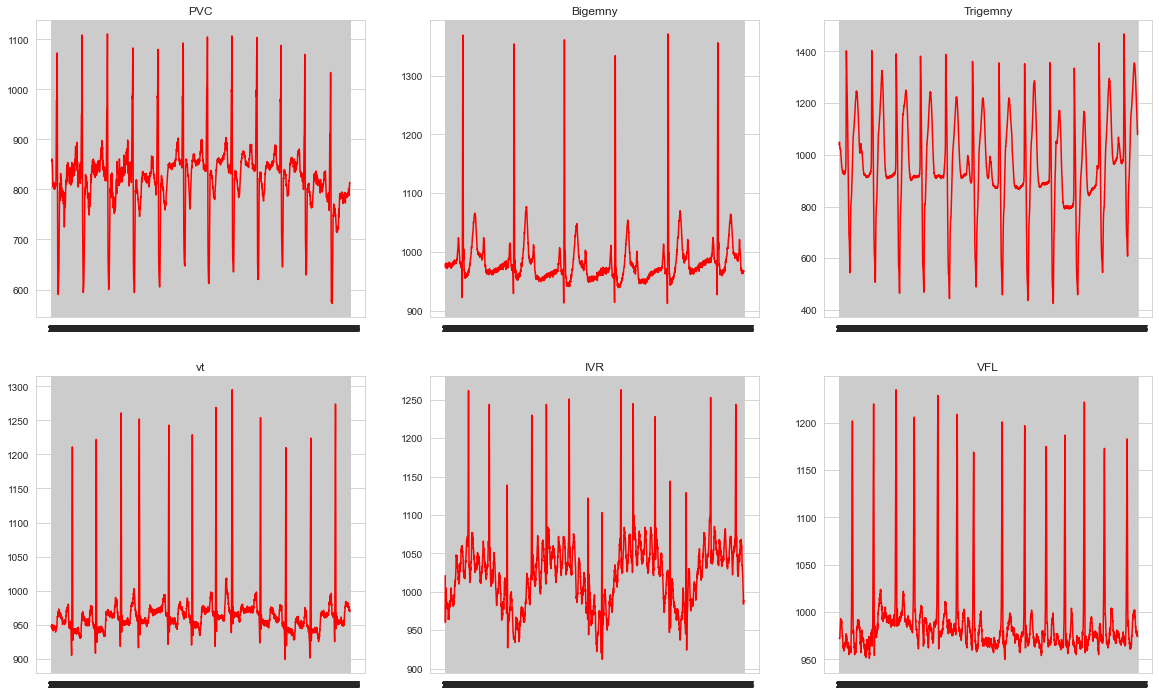

In [88]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.set_style('whitegrid')
plt.title("PVC", fontsize = 12)
plt.plot(l[6].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,2)
sns.set_style('whitegrid')
plt.title("Bigemny", fontsize = 12)
plt.plot(l[7].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,3)
sns.set_style('whitegrid')
plt.title("Trigemny", fontsize = 12)
plt.plot(l[8].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,4)
sns.set_style('whitegrid')
plt.title("vt", fontsize = 12)
plt.plot(l[9].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,5)
sns.set_style('whitegrid')
plt.title("IVR", fontsize = 12)
plt.plot(l[10].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,6)
sns.set_style('whitegrid')
plt.title("VFL", fontsize = 12)
plt.plot(l[11].iloc[0, 1:3599], color = 'red')
plt.show()

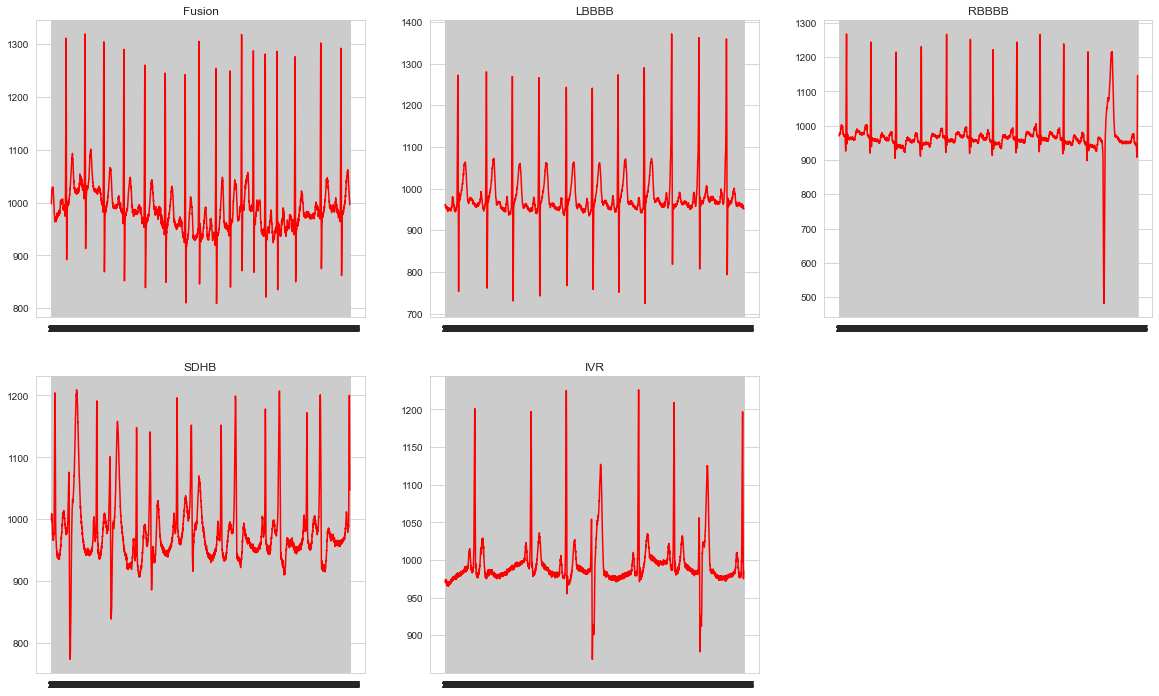

In [89]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.set_style('whitegrid')
plt.title("Fusion", fontsize = 12)
plt.plot(l[12].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,2)
sns.set_style('whitegrid')
plt.title("LBBBB", fontsize = 12)
plt.plot(l[13].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,3)
sns.set_style('whitegrid')
plt.title("RBBBB", fontsize = 12)
plt.plot(l[14].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,4)
sns.set_style('whitegrid')
plt.title("SDHB", fontsize = 12)
plt.plot(l[15].iloc[0, 1:3599], color = 'red')
plt.subplot(2,3,5)
sns.set_style('whitegrid')
plt.title("IVR", fontsize = 12)
plt.plot(l[16].iloc[0, 1:3599], color = 'red')
plt.show()

In [90]:
# sns.set_style('whitegrid')
# plt.figure(figsize = (20,8))
# plt.title("NSR", fontsize = 12)
# plt.plot(data1.iloc[0, 0:3599], color = 'red')
# plt.show

# Preparing data for training

In [12]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600
0,0,953,951,949,948,950,950,951,948,946,...,938,938,941,944,943,943,940,943,944,1
1,1,915,927,934,936,935,938,938,936,935,...,965,964,965,966,966,966,965,963,962,1
2,2,989,984,981,981,983,987,984,982,982,...,947,946,952,951,952,949,949,949,952,1
3,3,957,961,961,960,960,961,964,968,968,...,1128,1042,967,928,925,936,948,953,952,1
4,4,942,943,943,944,948,954,955,954,955,...,987,988,991,989,988,988,986,986,987,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,3,983,981,979,977,975,974,975,974,974,...,975,976,979,979,979,976,976,979,980,17
3,3,983,981,979,977,975,974,975,974,974,...,975,976,979,979,979,976,976,979,980,17
11,11,979,983,981,978,976,978,982,980,982,...,934,949,971,1007,1053,1115,1174,1227,1269,17
5,5,1006,1005,1009,1013,1017,1017,1017,1020,1023,...,977,974,975,972,974,976,976,977,976,17


In [13]:
x = df.iloc[:,1:-1].values
x.shape

(1954, 3600)

In [14]:
y = df[3600]
y.shape

(1954,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1309, 3600) (645, 3600) (1309,) (645,)


In [16]:
y_train = to_categorical(y_train)
y_train.shape

(1309, 18)

In [17]:
y = y_train[:,1:]
y.shape

(1309, 17)

In [18]:
X_train = X_train.reshape(len(X_train),X_train.shape[1],1)
X_train.shape

(1309, 3600, 1)

In [19]:
X_test = X_test.reshape(len(X_test),X_test.shape[1],1)
X_test.shape

(645, 3600, 1)

# Model

In [20]:
def build_model():
    model = Sequential()
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same', input_shape = (3600, 1))) #we pass individual values hence not 100000,187,1
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    model.add(Conv1D(filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    model.add(Conv1D( filters = 64, kernel_size = 6, activation='relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides = (2), padding = 'same'))
    model.add(Flatten())
    model.add(Dense(units = 64, activation='relu'))
    model.add(Dense(units = 64, activation='relu'))
    model.add(Dense(units = 17, activation='softmax'))
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [21]:
model = build_model()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 3600, 64)          448       
_________________________________________________________________
batch_normalization (BatchNo (None, 3600, 64)          256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1800, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1800, 64)          24640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1800, 64)          256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 900, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 900, 64)           2

# Training

In [23]:
history = model.fit(X_train, y, epochs = 10, batch_size = 32)

C:\Users\SOUMYA\.conda\envs\tf_gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
41/41 [==============================] - 8s 51ms/step - loss: 2.3753 - accuracy: 0.3308
Epoch 2/10
41/41 [==============================] - 2s 46ms/step - loss: 1.0312 - accuracy: 0.6860
Epoch 3/10
41/41 [==============================] - 2s 45ms/step - loss: 0.5527 - accuracy: 0.8289
Epoch 4/10
41/41 [==============================] - 2s 47ms/step - loss: 0.3285 - accuracy: 0.9053
Epoch 5/10
41/41 [==============================] - 2s 44ms/step - loss: 0.2053 - accuracy: 0.9351
Epoch 6/10
41/41 [==============================] - 2s 44ms/step - loss: 0.1377 - accuracy: 0.9610
Epoch 7/10
41/41 [==============================] - 2s 43ms/step - loss: 0.0755 - accuracy: 0.9832
Epoch 8/10
41/41 [==============================] - 2s 43ms/step - loss: 0.0538 - accuracy: 0.9878
Epoch 9/10
41/41 [==============================] - 2s 43ms/step - loss: 0.0233 - accuracy: 0.9977
Epoch 10/10
41/41 [==============================] - 2s 43ms/step - loss: 0.0085 - accuracy: 0.9992


In [24]:
model.save("heart_beat.h5")

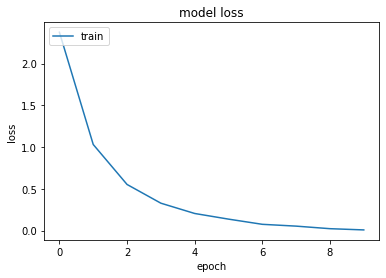

In [25]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [26]:
predictions = model.predict(X_test)

In [27]:
y_hat = np.argmax(predictions, axis = 1)
y_hat = y_hat+1

In [28]:
accuracy_score(y_test, y_hat)*100

68.21705426356588

<AxesSubplot:>

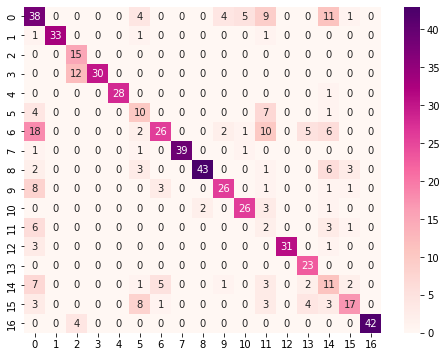

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_hat, y_test), annot = True, fmt = '0.0f', cmap= 'RdPu')

# Prediction

In [30]:
from tensorflow.keras import models 
import numpy as np
import scipy.io as sio

In [31]:
model = models.load_model("heart_beat.h5")
labels=['NSR','ABP','AFL','AFIB','SVTA','WPW',
        'PVC','Bigeminy','Trigeminy','VT','IVR',
        'VFL','Fusion','LBBBB','RBBBB','SDHB','PR']

In [32]:
def predict_beat(data):
    test = sio.loadmat(data)
    test_data = test['val'][0]
    test_data = test_data.reshape(1,3600,1)
    pred = model.predict(test_data)
    y = np.argmax(pred, axis = 1)
    return np.argmax(pred, axis = 1)[0]

In [33]:
labels[predict_beat('100m (0).mat')]

C:\Users\SOUMYA\.conda\envs\tf_gpu\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


'NSR'